In [1]:
#1. xor예제를 이용한 덧셈결과 예측. svc이용
#2. 두개의 한자리수를 더해서 carry여부 예측, 그러니까 정수만 훈련해서 실수인경우를 예측 해보자
"""
훈련은 0~9까지의 정수만 사용. 두수가 합해서 10인 경우를 무시하면 총 91가지.
그래도 0~9.9까지의 실수인 경우에 적용해도 거의 정확하다.

정확도 향상방법
1. linear svc를 사용.
이상적인 분류를 하는 기준은 x+y==10인 직선이다.
2. 훈련시 x+y==10이 되는 경우는 무시.
훈련시 x+y가 10인 경우를 무시하면 합이 9와 11사이에 중간인 10을 기준으로 분류하는데
무시하지 않으면 9와 10사이의 중간인 9.5를 기준으로 분류를 한다.

"""
from sklearn import svm
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def print_acc(data,label,pre):
    ok=0; total=0
    for idx, answer in enumerate(label):
        p=pre[idx]
        if p==answer: ok+=1
        total +=1

    print("정답률:",ok,"/",total,"=",ok/total)

def draw_scatter(x,y,pre,title=""):
    plt.rcParams["figure.figsize"] = (10,10)
    fig, ax = plt.subplots()

    ax.scatter(x, y, c=pre, zorder=10, cmap=plt.cm.Paired,
                    edgecolor='k', s=30)
    ax.plot([0,10], [10,0], 'k--', lw=2)
    #ax.plot([0,9.5], [9.5,0], 'k--', lw=2)
    #ax.plot( np.linspace(10,0))
    #ax.plot( x,y)
    plt.title(title)
    plt.show()    


C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


정답률: 100 / 100 = 1.0


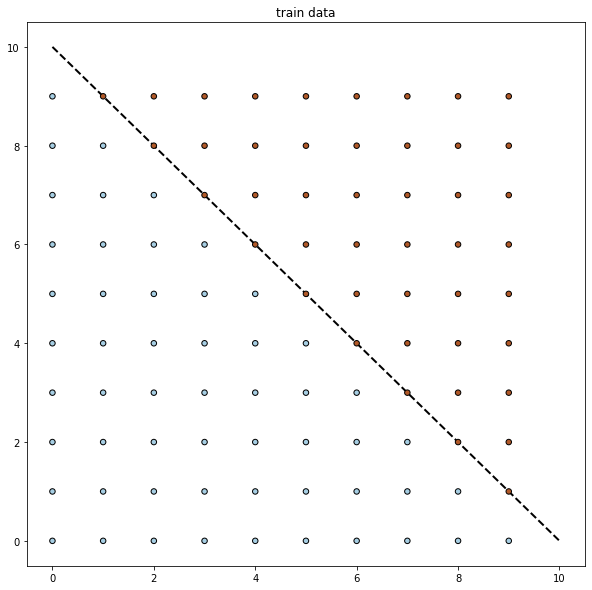

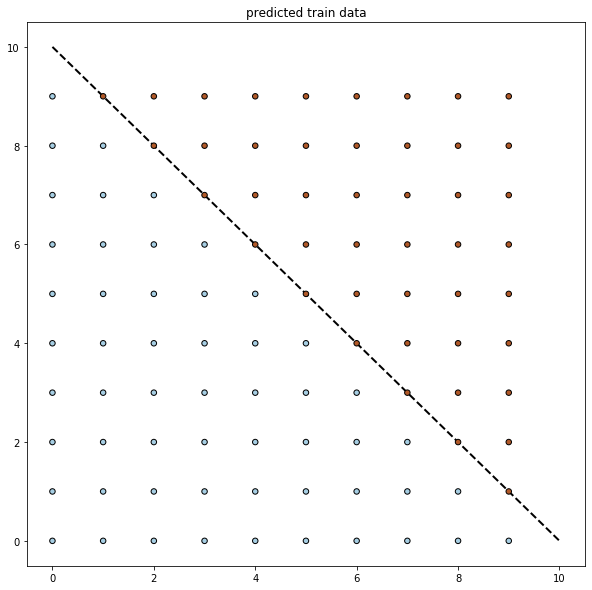

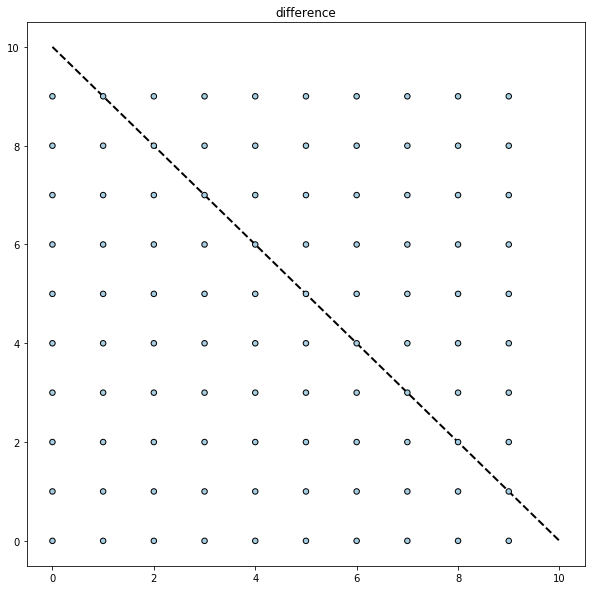

In [5]:
#train, ignore p+q==10
data=[]
label=[]
x=[]
y=[]
for p in range(10):
    for q in range(10):
        #if p+q==10: continue
        r=(p+q)//10 #carry

        x.append(p)
        y.append(q)
        data.append([p,q])
        label.append(r)

clf=svm.LinearSVC()

clf.fit(data,label)

pre=clf.predict(data)
print_acc(data,label,pre)
draw_scatter(x,y,label,"train data")
draw_scatter(x,y,pre,"predicted train data")

dif=[]
for a in range(len(label)):
    dif.append(pre[a]!=label[a])
draw_scatter(x,y,dif,"difference")

정답률: 476 / 500 = 0.952


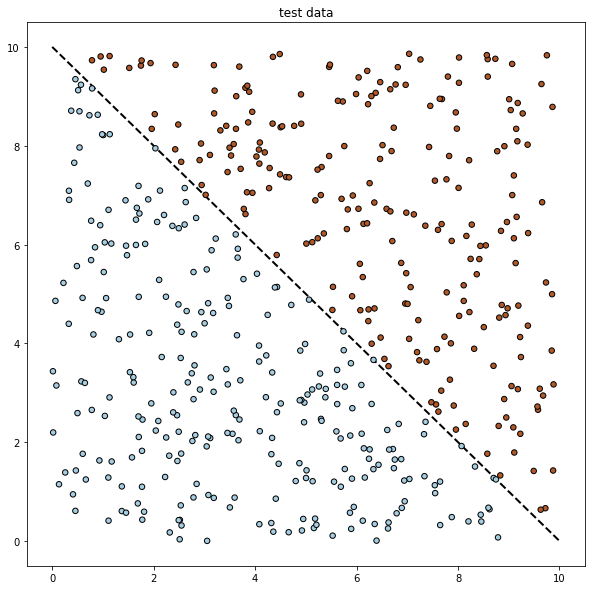

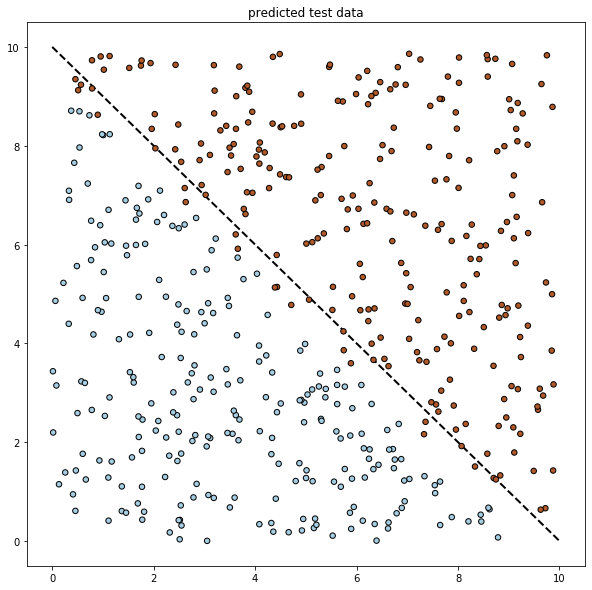

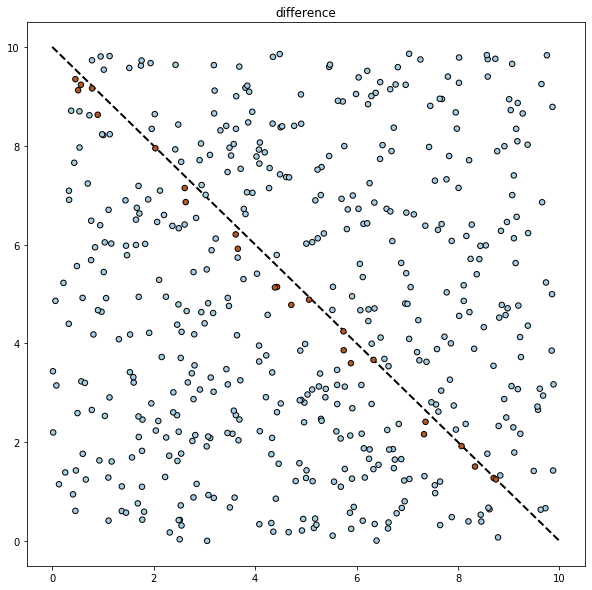

In [6]:
#test 500
test_data=[]
x=[]
y=[]
test_label=[]
for _ in range(500):
    p=random.random()*9.9
    q=random.random()*9.9
    r=(p+q)//10 #carry

    x.append(p)
    y.append(q)
    test_data.append([p,q])
    test_label.append(r)

pre=clf.predict(test_data)
print_acc(test_data,test_label,pre)
draw_scatter(x,y,test_label,"test data")
draw_scatter(x,y,pre,"predicted test data")

l=np.array(test_label)
p=np.array(pre)
dif=l!=p
draw_scatter(x,y,dif,"difference")

정답률: 4722 / 5000 = 0.9444


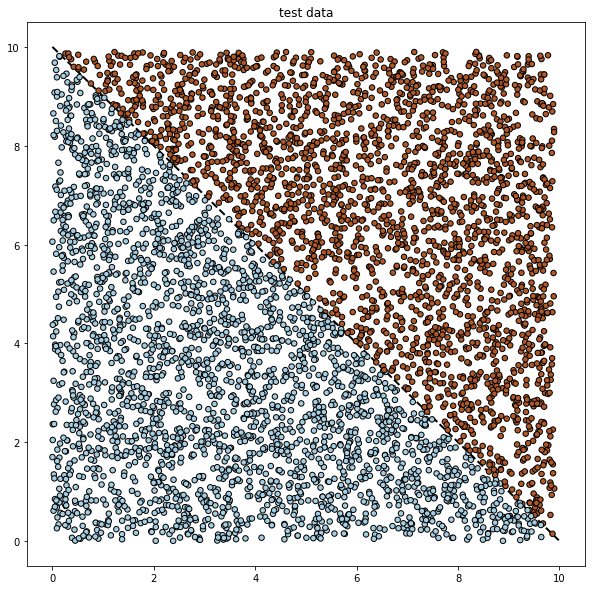

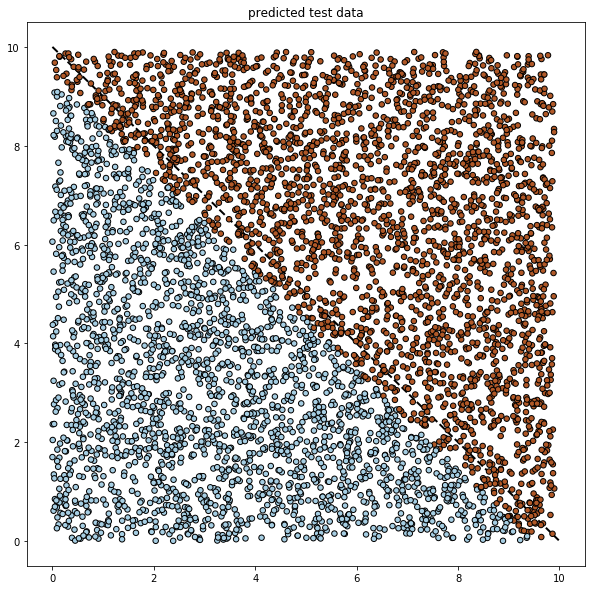

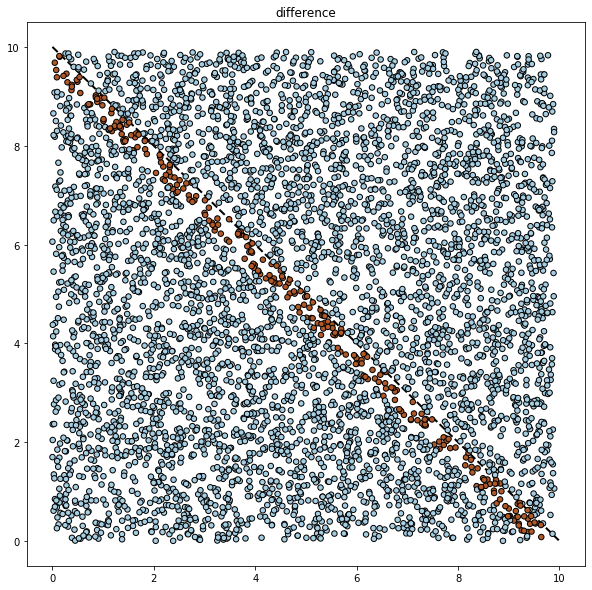

In [7]:
#test 5000
test_data=np.array([[random.random()*9.9,random.random()*9.9] for _ in range(5000)])    
test_label=(test_data[:,0]+test_data[:,1])//10

pre=clf.predict(test_data)
print_acc(test_data,test_label,pre)
draw_scatter(test_data[:,0],test_data[:,1],test_label,"test data")
draw_scatter(test_data[:,0],test_data[:,1],pre,"predicted test data")

dif=test_label!=pre
draw_scatter(test_data[:,0],test_data[:,1],dif,"difference")